In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import xgboost as xgb

/home/jiashen/env3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv('train_c.csv')
test = pd.read_csv('test_c.csv')

In [12]:
col = list(test.columns)[2:]
label = train['price_doc']*.969+10

In [13]:
dtrain = xgb.DMatrix(train[col],label)
dtest = xgb.DMatrix(test[col])

In [14]:
params = {
    'eta': 0.05, ## Try 0.01,3,5
    'max_depth': 5,## Try 4,5,6
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1,
    'lambda':10,
    'min_child_weight':5
}

[0]	train-rmse:7.96267e+06	test-rmse:7.96559e+06
[50]	train-rmse:2.60514e+06	test-rmse:2.8689e+06
[100]	train-rmse:2.2568e+06	test-rmse:2.66611e+06
[150]	train-rmse:2.14422e+06	test-rmse:2.62511e+06
[200]	train-rmse:2.06025e+06	test-rmse:2.60009e+06
[250]	train-rmse:1.99182e+06	test-rmse:2.58521e+06
[300]	train-rmse:1.93196e+06	test-rmse:2.57704e+06
[350]	train-rmse:1.88212e+06	test-rmse:2.57088e+06
Performance does not improve from 364 rounds


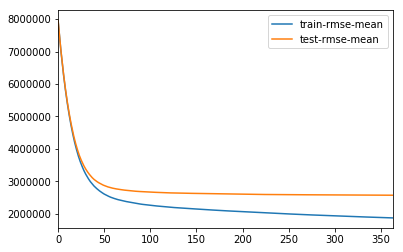

In [15]:
xgb_cvalid = xgb.cv(params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False,seed=42)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')

In [ ]:
#params = {
 #   'eta': 0.05, ## Try 0.01,3,5
  #  'max_depth': 5,## Try 4,5,6
  #  'subsample': 0.7,
  #  'colsample_bytree': 0.7,
  #  'objective': 'reg:linear',
  #  'eval_metric': 'rmse',
  #  'silent': 1,
  #  'lambda':10,
  #  'min_child_weight':5
#}
#[0]	train-rmse:7.80654e+06	test-rmse:7.8094e+06
#[50]	train-rmse:2.55406e+06	test-rmse:2.81265e+06
#[100]	train-rmse:2.21255e+06	test-rmse:2.61384e+06
#[150]	train-rmse:2.10217e+06	test-rmse:2.57364e+06
#[200]	train-rmse:2.01985e+06	test-rmse:2.54911e+06
#[250]	train-rmse:1.95276e+06	test-rmse:2.53452e+06
#[300]	train-rmse:1.89408e+06	test-rmse:2.52650e+06
#[350]	train-rmse:1.84521e+06	test-rmse:2.52047e+06
#Performance does not improve from 364 rounds

#params = {
 #   'eta': 0.05, ## Try 0.01,3,5
 #   'max_depth': 5,## Try 4,5,6
 #   'subsample': 0.7,
 #   'colsample_bytree': 0.7,
 #   'objective': 'reg:linear',
 #   'eval_metric': 'rmse',
 #   'silent': 1,
 #   'lambda':90,
 #   'min_child_weight':5
#}
#[0]	train-rmse:7.83357e+06	test-rmse:7.83367e+06
#[50]	train-rmse:2.89283e+06	test-rmse:3.01259e+06
#[100]	train-rmse:2.47324e+06	test-rmse:2.71492e+06
#[150]	train-rmse:2.33258e+06	test-rmse:2.63791e+06
#[200]	train-rmse:2.24237e+06	test-rmse:2.59875e+06
#[250]	train-rmse:2.1708e+06	test-rmse:2.57325e+06
#[300]	train-rmse:2.11301e+06	test-rmse:2.55746e+06
#[350]	train-rmse:2.06434e+06	test-rmse:2.546e+06
#[400]	train-rmse:2.02051e+06	test-rmse:2.53766e+06
#[450]	train-rmse:1.9807e+06	test-rmse:2.53069e+06
#[500]	train-rmse:1.94442e+06	test-rmse:2.52496e+06
#[550]	train-rmse:1.90954e+06	test-rmse:2.52092e+06
#[600]	train-rmse:1.87611e+06	test-rmse:2.51673e+06
#[650]	train-rmse:1.84536e+06	test-rmse:2.51521e+06
#[700]	train-rmse:1.81493e+06	test-rmse:2.51316e+06
#[750]	train-rmse:1.78755e+06	test-rmse:2.51299e+06
#Performance does not improve from 737 rounds

#0.969
#[0]	train-rmse:7.96267e+06	test-rmse:7.96559e+06
#[50]	train-rmse:2.60514e+06	test-rmse:2.8689e+06
#[100]	train-rmse:2.2568e+06	test-rmse:2.66611e+06
#[150]	train-rmse:2.14422e+06	test-rmse:2.62511e+06
#[200]	train-rmse:2.06025e+06	test-rmse:2.60009e+06
#[250]	train-rmse:1.99182e+06	test-rmse:2.58521e+06
#[300]	train-rmse:1.93196e+06	test-rmse:2.57704e+06
#[350]	train-rmse:1.88212e+06	test-rmse:2.57088e+06
#Performance does not improve from 364 rounds


In [17]:
model1 =xgb.train(params,dtrain,num_boost_round=364)

In [18]:
pred_adjust = model1.predict(dtest)

In [19]:
sub = pd.DataFrame({'id':test['id'],'price_doc':pred_adjust})

In [20]:
sub.to_csv('AdjustParamsTry.csv',index=False)